## Dynamic Plot | Plotly
Python code to build a time series comparison in a Dynamic Dashboard using Plotly Express.

### 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as py

### 2. History Data

#### 2.1 BCE-117

In [2]:
history117 = pd.read_csv("2_history_117.txt", sep = "\t", index_col=[0])
history117.index = pd.to_datetime(history117.index,dayfirst = True)
history117.index.name = "Date"

In [3]:
history117.head()

,"PROD:Oil Rate (H), sm3/day","INJECTOR:Water Injection Rate (H), sm3/day","PROD:Liquid Rate (H), sm3/day","PROD:Oil Total (H), sm3","PROD:Liquid Total (H), sm3","PROD:Water Rate (H), sm3/day","PROD:Gas Rate (H), sm3/day","PROD:Bottom Hole Pressure (H), Bars"
Date,,,,,,,,
2018-04-06 00:00:00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-06 00:18:00,0.0,75,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-06 00:37:00,0.0,75,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-06 00:56:00,0.0,75,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-06 01:14:00,0.0,75,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
history117.columns = history117.columns.str.replace(pat="PROD", repl="BCE-117")
history117.columns = history117.columns.str.replace(pat="INJECTOR", repl="BCE-117")

In [5]:
history117.head()

,"BCE-117:Oil Rate (H), sm3/day","BCE-117:Water Injection Rate (H), sm3/day","BCE-117:Liquid Rate (H), sm3/day","BCE-117:Oil Total (H), sm3","BCE-117:Liquid Total (H), sm3","BCE-117:Water Rate (H), sm3/day","BCE-117:Gas Rate (H), sm3/day","BCE-117:Bottom Hole Pressure (H), Bars"
Date,,,,,,,,
2018-04-06 00:00:00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-06 00:18:00,0.0,75,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-06 00:37:00,0.0,75,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-06 00:56:00,0.0,75,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-06 01:14:00,0.0,75,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
(history117.reset_index().iloc[:,0].diff().dropna()/60).describe()

count                          459
mean     0 days 00:51:49.019607843
std      0 days 01:58:53.628720220
min                0 days 00:00:18
25%                0 days 00:00:30
50%                0 days 00:02:01
75%                0 days 00:24:00
max                0 days 12:48:00
Name: Date, dtype: object

#### 2.2 LA-306

In [7]:
history306 = pd.read_csv("1_history_306.txt", sep = "\t", index_col=[0])
history306.index = pd.to_datetime(history306.index,dayfirst = True)
history306.index.name = "Date"

In [8]:
history306.head()

,"LA-306H:Oil Rate (H), sm3/day","LA-306H:Water Injection Rate (H), sm3/day","LA-306H:Liquid Rate (H), sm3/day","LA-306H:Oil Total (H), sm3","LA-306H:Liquid Total (H), sm3","LA-306H:Water Injection Total (H), sm3","LA-306H:Water Rate (H), sm3/day","LA-306H:Gas Rate (H), sm3/day","LA-306H:Bottom Hole Pressure (H), Bars"
Date,,,,,,,,,
2020-01-14 00:00:00,0.0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2020-01-14 00:30:00,0.0,650,0.0,0.0,0.0,13.65,0.0,0.0,0.0
2020-01-14 01:00:00,0.0,650,0.0,0.0,0.0,27.30,0.0,0.0,0.0
2020-01-14 01:30:00,0.0,650,0.0,0.0,0.0,40.95,0.0,0.0,0.0
2020-01-14 02:00:00,0.0,650,0.0,0.0,0.0,54.60,0.0,0.0,0.0


#### 2.3 MIX

In [9]:
both_wells_no_date = pd.concat([history306.reset_index().iloc[:,1:],history117.reset_index().iloc[:,1:]], axis = 1)
both_wells_no_date_1h = pd.concat([history306.resample("1h").mean().reset_index().iloc[:,1:],history117.resample("1h").mean().reset_index().iloc[:,1:]], axis = 1)
both_wells_no_date_1d = pd.concat([history306.resample("1d").mean().reset_index().iloc[:,1:],history117.resample("1d").mean().reset_index().iloc[:,1:]], axis = 1)

### 3. History Resampled 1h Chart

In [10]:
oil306_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Oil Rate")) & (both_wells_no_date_1h.columns.str.contains("306")))[0][0]]
oil117_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Oil Rate")) & (both_wells_no_date_1h.columns.str.contains("117")))[0][0]]
oilt306_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Oil Total")) & (both_wells_no_date_1h.columns.str.contains("306")))[0][0]]
oilt117_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Oil Total")) & (both_wells_no_date_1h.columns.str.contains("117")))[0][0]]

water306_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Water Rate")) & (both_wells_no_date_1h.columns.str.contains("306")))[0][0]]
water117_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Water Rate")) & (both_wells_no_date_1h.columns.str.contains("117")))[0][0]]

liquid306_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Liquid Rate")) & (both_wells_no_date_1h.columns.str.contains("306")))[0][0]]
liquid117_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Liquid Rate")) & (both_wells_no_date_1h.columns.str.contains("117")))[0][0]]
liquidt306_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Liquid Total")) & (both_wells_no_date_1h.columns.str.contains("306")))[0][0]]
liquidt117_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Liquid Total")) & (both_wells_no_date_1h.columns.str.contains("117")))[0][0]]

gas306_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Gas Rate")) & (both_wells_no_date_1h.columns.str.contains("306")))[0][0]]
gas117_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Gas Rate")) & (both_wells_no_date_1h.columns.str.contains("117")))[0][0]]
bhp306_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Bottom")) & (both_wells_no_date_1h.columns.str.contains("306")))[0][0]]
bhp117_1h = both_wells_no_date_1h.iloc[:,np.where((both_wells_no_date_1h.columns.str.contains("Bottom")) & (both_wells_no_date_1h.columns.str.contains("117")))[0][0]]


titles_h = ["Oil Rate (H), sm3/day", "Liquid Rate (H), sm3/day", "Oil Total (H), sm3/day", "Water Rate (H), sm3/day", "Gas Rate (H), sm3/day", "BHP (H), sm3/day", "Liquid Total (H), sm3/day"]

c306 = "red"
c117 = "purple"

scoil306_1h = go.Scatter(y = oil306_1h, mode = "markers",marker = dict(color = c306,size = 3),name="LA-306", legendgroup = "LA-306")
scoil117_1h = go.Scatter(y = oil117_1h, mode = "markers",marker = dict(color = c117,size = 3),name="BCE-117", legendgroup = "BCE-117")

scoilt306_1h = go.Scatter(y = oilt306_1h, mode = "markers",marker = dict(color = c306,size = 3),name="LA-306", legendgroup = "LA-306", showlegend = False)
scoilt117_1h = go.Scatter(y = oilt117_1h, mode = "markers",marker = dict(color = c117,size = 3),name="BCE-117", legendgroup = "BCE-117", showlegend = False)

scwater306_1h = go.Scatter(y = water306_1h, mode = "markers",marker = dict(color = c306,size = 3),name="LA-306", legendgroup = "LA-306", showlegend = False)
scwater117_1h = go.Scatter(y = water117_1h, mode = "markers",marker = dict(color = c117,size = 3),name="BCE-117", legendgroup = "BCE-117", showlegend = False)

scgas306_1h = go.Scatter(y = gas306_1h, mode = "markers",marker = dict(color = c306,size = 3),name="LA-306", legendgroup = "LA-306", showlegend = False)
scgas117_1h = go.Scatter(y = gas117_1h, mode = "markers",marker = dict(color = c117,size = 3),name="BCE-117", legendgroup = "BCE-117", showlegend = False)

scbhp306_1h = go.Scatter(y = bhp306_1h, mode = "markers",marker = dict(color = c306,size = 3),name="LA-306", legendgroup = "LA-306", showlegend = False)
scbhp117_1h = go.Scatter(y = bhp117_1h, mode = "markers",marker = dict(color = c117,size = 3),name="BCE-117", legendgroup = "BCE-117", showlegend = False)

scliquid306_1h = go.Scatter(y = liquid306_1h, mode = "markers",marker = dict(color = c306,size = 3),name="LA-306", legendgroup = "LA-306", showlegend = False)
scliquid117_1h = go.Scatter(y = liquid117_1h, mode = "markers",marker = dict(color = c117,size = 3),name="BCE-117", legendgroup = "BCE-117", showlegend = False)

scliquidt306_1h = go.Scatter(y = liquidt306_1h, mode = "markers",marker = dict(color = c306,size = 3),name="LA-306", legendgroup = "LA-306", showlegend = False)
scliquidt117_1h = go.Scatter(y = liquidt117_1h, mode = "markers",marker = dict(color = c117,size = 3),name="BCE-117", legendgroup = "BCE-117", showlegend = False)

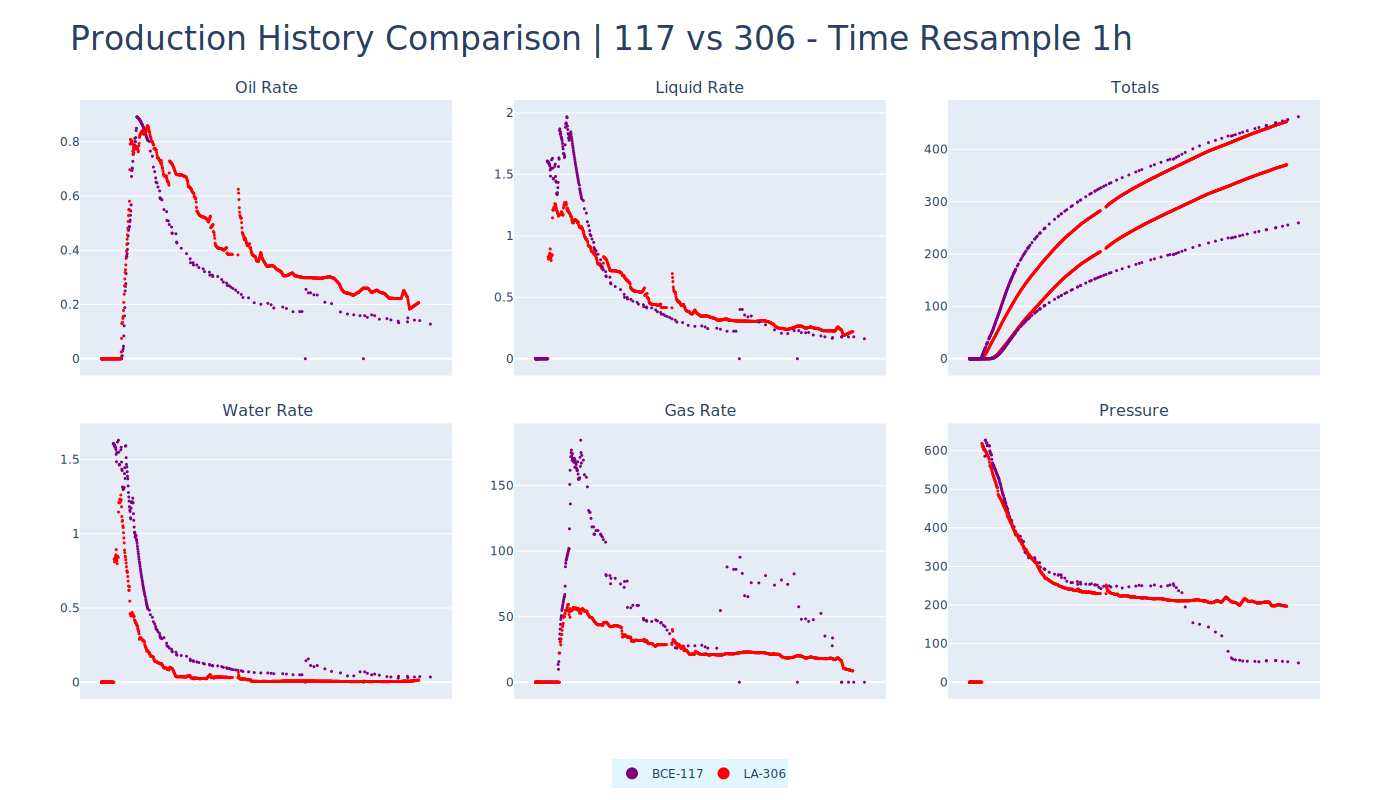

In [11]:
fig = make_subplots(rows = 2, cols = 3, 
                horizontal_spacing = 0.05,
                vertical_spacing = 0.08,
                subplot_titles = ("Oil Rate", "Liquid Rate", "Totals", "Water Rate", "Gas Rate", "Pressure"))

fig.add_trace(scoil117_1h, row = 1, col = 1)
fig.add_trace(scoil306_1h, row = 1, col = 1)

fig.add_trace(scliquid306_1h, row = 1, col = 2)
fig.add_trace(scliquid117_1h, row = 1, col = 2)

fig.add_trace(scliquidt306_1h, row = 1, col = 3)
fig.add_trace(scliquidt117_1h, row = 1, col = 3)
fig.add_trace(scoilt306_1h, row = 1, col = 3)
fig.add_trace(scoilt117_1h, row = 1, col = 3)

fig.add_trace(scwater117_1h, row = 2, col = 1)
fig.add_trace(scwater306_1h, row = 2, col = 1)

fig.add_trace(scgas117_1h, row = 2, col = 2)
fig.add_trace(scgas306_1h, row = 2, col = 2)

fig.add_trace(scbhp117_1h, row = 2, col = 3)
fig.add_trace(scbhp306_1h, row = 2, col = 3)

fig.update_layout(height=800, width=1400, title_text="Production History Comparison | 117 vs 306 - Time Resample 1h", title_font = dict(size = 33),
                  xaxis1 = dict(title = "Time",visible=False, titlefont=dict(size=8)),
                  xaxis2 = dict(title = "Time",visible=False, titlefont=dict(size=8)), 
                  xaxis3 = dict(title = "Time",visible=False, titlefont=dict(size=8)), 
                  xaxis4 = dict(title = "Time",visible=False, titlefont=dict(size=8)), 
                  xaxis5 = dict(title = "Time",visible=False, titlefont=dict(size=8)), 
                  xaxis6 = dict(title = "Time",visible=False, titlefont=dict(size=8)), 
                 legend = dict(
                     orientation = "h",
                     bgcolor = "#E1F6FF",
                     x = 0.5,
                     itemsizing = "constant",
                     xanchor = "auto"
                 )
                 )
# py.plot(fig,filename="History_Comparison_117vs306_Resample1h.html", auto_open = False)
fig.show("svg")